In [18]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

from xgboost import XGBClassifier   # MODEL YANG DIPAKAI

%matplotlib inline

# Dataset

In [2]:
import pandas as pd
import os

base_path = r"C:\Users\Zain Iqbal Saputra\Model XGBoost\Dataset"
all_data = []

for person in os.listdir(base_path):
    person_folder = os.path.join(base_path, person)
    
    if not os.path.isdir(person_folder):
        continue  # skip file, only folders
    
    for activity in os.listdir(person_folder):
        activity_folder = os.path.join(person_folder, activity)

        acc_file = os.path.join(activity_folder, "Accelerometer.csv")
        gyro_file = os.path.join(activity_folder, "Gyroscope.csv")
        mag_file = os.path.join(activity_folder, "Magnetometer.csv")

        if os.path.exists(acc_file) and os.path.exists(gyro_file) and os.path.exists(mag_file):
            accel = pd.read_csv(acc_file)
            gyro = pd.read_csv(gyro_file)
            mag = pd.read_csv(mag_file)

            # Round and rename columns
            accel["Time (s)"] = accel["Time (s)"].round(2)
            gyro["Time (s)"] = gyro["Time (s)"].round(2)
            mag["Time (s)"] = mag["Time (s)"].round(2)

            accel.columns = ["Time (s)", "Accel_X", "Accel_Y", "Accel_Z"]
            gyro.columns = ["Time (s)", "Gyro_X", "Gyro_Y", "Gyro_Z"]
            mag.columns = ["Time (s)", "Mag_X", "Mag_Y", "Mag_Z"]

            # Merge
            df = accel.merge(gyro, on="Time (s)", how="inner").merge(mag, on="Time (s)", how="inner")

            # Tambah kolom identitas
            df["Activity"] = activity
            df["Person"] = person  # penting! supaya tau data siapa

            all_data.append(df)

# Gabungkan semua
final_data = pd.concat(all_data, ignore_index=True)

print(final_data.head(20))
print("\nTotal rows:", len(final_data))
print("Unique Activities:", final_data["Activity"].unique())
print("Unique Person:", final_data["Person"].unique())

    Time (s)   Accel_X   Accel_Y    Accel_Z    Gyro_X    Gyro_Y    Gyro_Z  \
0       0.06  1.323829  1.643869   9.500104 -0.385359  0.143145 -0.384960   
1       0.06  1.323829  1.643869   9.500104 -0.360858  0.084555 -0.378568   
2       0.06  1.323829  1.643869   9.500104 -0.335292 -0.008123 -0.373242   
3       0.06  1.323829  1.643869   9.500104 -0.298008 -0.123038 -0.367915   
4       0.06  1.429113  1.567299   9.686745 -0.385359  0.143145 -0.384960   
5       0.06  1.429113  1.567299   9.686745 -0.360858  0.084555 -0.378568   
6       0.06  1.429113  1.567299   9.686745 -0.335292 -0.008123 -0.373242   
7       0.06  1.429113  1.567299   9.686745 -0.298008 -0.123038 -0.367915   
8       0.06  1.534397  1.576870   9.916455 -0.385359  0.143145 -0.384960   
9       0.06  1.534397  1.576870   9.916455 -0.360858  0.084555 -0.378568   
10      0.06  1.534397  1.576870   9.916455 -0.335292 -0.008123 -0.373242   
11      0.06  1.534397  1.576870   9.916455 -0.298008 -0.123038 -0.367915   

# Memisahkan Data menjadi per variabel

In [6]:
import os
import pandas as pd

base_path = r"C:\Users\Zain Iqbal Saputra\Model XGBoost\Dataset"
output_path = r"C:\Users\Zain Iqbal Saputra\Model XGBoost\Output_Data"
os.makedirs(output_path, exist_ok=True)

activities = [
    "Rest", "Sprint", "Walking"
]

# Siapkan dictionary penampung masing-masing aktivitas
activity_frames = {act: [] for act in activities}

for person in os.listdir(base_path):
    person_folder = os.path.join(base_path, person)
    if not os.path.isdir(person_folder):
        continue

    for act in activities:
        activity_folder = os.path.join(person_folder, act)

        if not os.path.exists(activity_folder):
            continue

        acc = pd.read_csv(os.path.join(activity_folder, "Accelerometer.csv"))
        gyro = pd.read_csv(os.path.join(activity_folder, "Gyroscope.csv"))
        mag = pd.read_csv(os.path.join(activity_folder, "Magnetometer.csv"))

        acc["Time (s)"] = acc["Time (s)"].round(2)
        gyro["Time (s)"] = gyro["Time (s)"].round(2)
        mag["Time (s)"] = mag["Time (s)"].round(2)

        acc.columns = ["Time (s)", "Accel_X", "Accel_Y", "Accel_Z"]
        gyro.columns = ["Time (s)", "Gyro_X", "Gyro_Y", "Gyro_Z"]
        mag.columns = ["Time (s)", "Mag_X", "Mag_Y", "Mag_Z"]

        df = acc.merge(gyro, on="Time (s)").merge(mag, on="Time (s)")
        df["Activity"] = act
        df["Person"] = person

        activity_frames[act].append(df)
        print(f"{person} -> {act} ✅")

# Simpan masing-masing aktivitas ke file terpisah
for act, frames in activity_frames.items():
    if frames:
        final_df = pd.concat(frames, ignore_index=True)
        final_df.to_csv(os.path.join(output_path, f"{act}.csv"), index=False)
        print(f"SAVED ✅ {act} -> {len(final_df)} rows")

Data 1 -> Rest ✅
Data 1 -> Sprint ✅
Data 1 -> Walking ✅
Data 2 -> Rest ✅
Data 2 -> Sprint ✅
Data 2 -> Walking ✅
Data 3 -> Rest ✅
Data 3 -> Sprint ✅
Data 3 -> Walking ✅
SAVED ✅ Rest -> 735406 rows
SAVED ✅ Sprint -> 755067 rows
SAVED ✅ Walking -> 744997 rows


In [20]:
# paths — sesuaikan kalau perlu
BASE_OUTPUT = r"C:\Users\Zain Iqbal Saputra\Model XGBoost\Output_Data"

ACTIVITIES = [
    "Rest", "Sprint", "Walking"
]

SAMPLING_RATE = 50
WINDOW_SECONDS = 2
WINDOW_SIZE = int(WINDOW_SECONDS * SAMPLING_RATE)
STEP_SECONDS = 1
STEP_SIZE = int(STEP_SECONDS * SAMPLING_RATE)

print("Setup done. Window size:", WINDOW_SIZE, "step:", STEP_SIZE)

Setup done. Window size: 100 step: 50


# Perbandingan

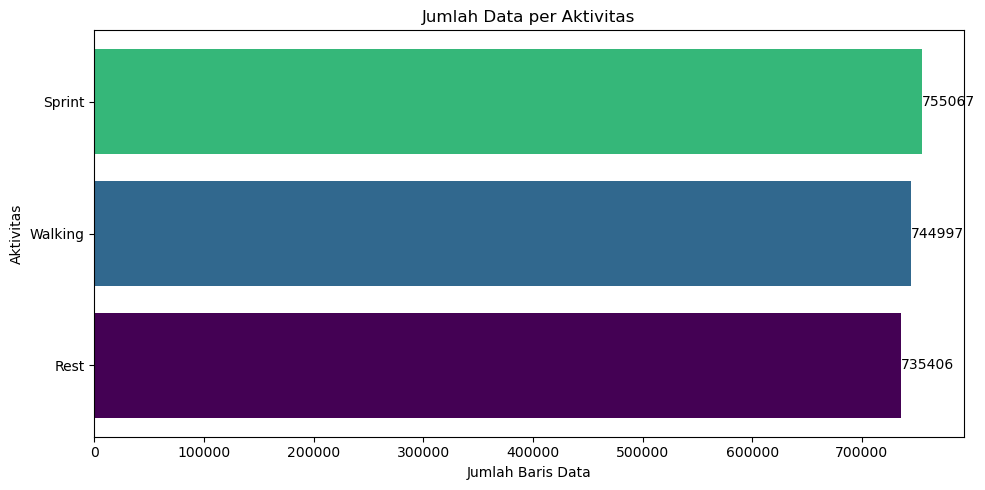

In [23]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Folder output CSV kamu
BASE_OUTPUT = r"C:\Users\Zain Iqbal Saputra\Model XGBoost\Output_Data"

ACTIVITIES = [
    "Rest", "Sprint", "Walking"
]

counts = {}

for act in ACTIVITIES:
    file_path = os.path.join(BASE_OUTPUT, f"{act}.csv")
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        counts[act] = len(df)
    else:
        counts[act] = 0

# Convert ke pandas series & sort
counts_series = pd.Series(counts).sort_values(ascending=True)

# warna — bisa diganti sesuai selera
colors = plt.cm.viridis([i/len(counts_series) for i in range(len(counts_series))])

plt.figure(figsize=(10, 5))
plt.barh(counts_series.index, counts_series.values, color=colors)
plt.title("Jumlah Data per Aktivitas")
plt.xlabel("Jumlah Baris Data")
plt.ylabel("Aktivitas")

# label angka di ujung batang
for index, value in enumerate(counts_series.values):
    plt.text(value + 50, index, str(value), va='center')

plt.tight_layout()
plt.show()

Feature dataset shape: (22352, 55)
Train size: 17881
Test size: 4471
=== Classification Report (XGBoost) ===
              precision    recall  f1-score   support

        Rest       1.00      1.00      1.00      1471
      Sprint       0.99      1.00      1.00      1510
     Walking       0.99      0.99      0.99      1490

    accuracy                           0.99      4471
   macro avg       0.99      0.99      0.99      4471
weighted avg       0.99      0.99      0.99      4471



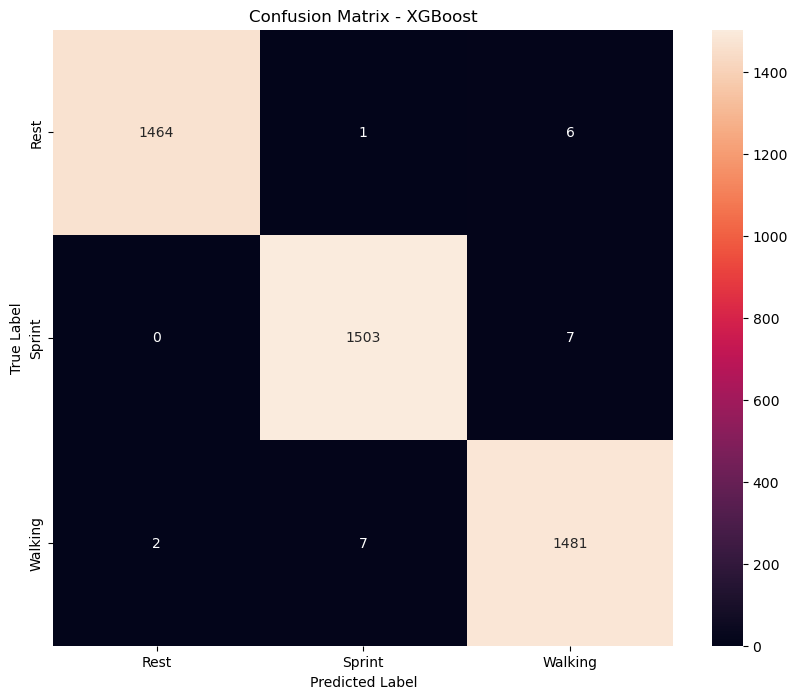

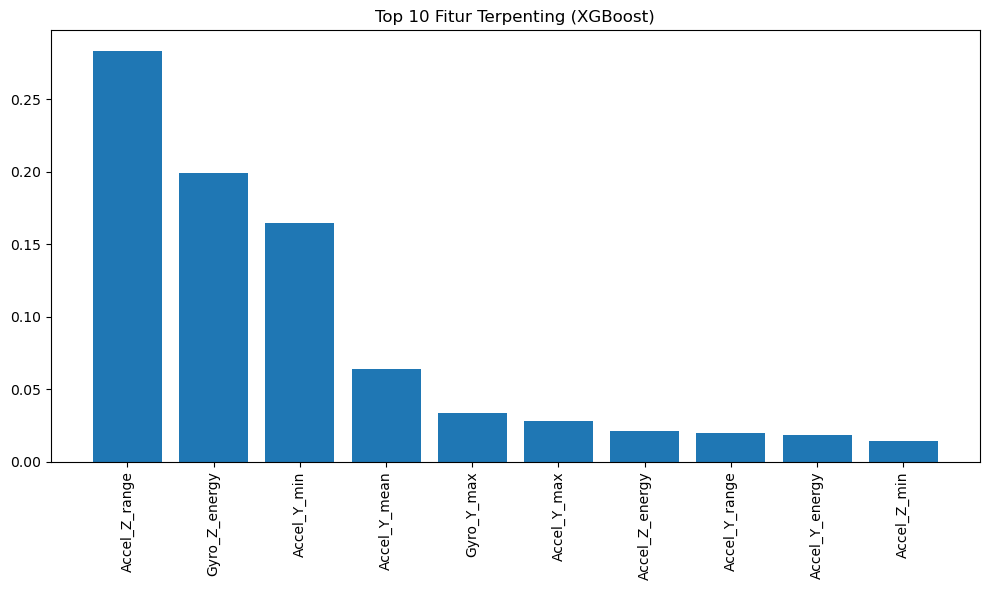

In [25]:
BASE_OUTPUT = r"C:\Users\Zain Iqbal Saputra\Model XGBoost\Output_Data"
ACTIVITIES = ["Rest", "Sprint", "Walking"]

WINDOW_SIZE = 150
STEP_SIZE = 100

def extract_features_from_window(window_df):
    features = {}
    for col in ["Accel_X", "Accel_Y", "Accel_Z",
                "Gyro_X", "Gyro_Y", "Gyro_Z",
                "Mag_X", "Mag_Y", "Mag_Z"]:
        
        data = window_df[col].values
        features[f"{col}_mean"]   = np.mean(data)
        features[f"{col}_std"]    = np.std(data)
        features[f"{col}_max"]    = np.max(data)
        features[f"{col}_min"]    = np.min(data)
        features[f"{col}_range"]  = np.max(data) - np.min(data)
        features[f"{col}_energy"] = np.sum(data**2) / len(data)
    
    return features

all_features = []

for act in ACTIVITIES:
    file = os.path.join(BASE_OUTPUT, f"{act}.csv")
    if os.path.exists(file):
        df = pd.read_csv(file)
        df["Activity"] = act
        
        for i in range(0, len(df) - WINDOW_SIZE, STEP_SIZE):
            window = df.iloc[i:i+WINDOW_SIZE]
            feat = extract_features_from_window(window)
            feat["Activity"] = act
            all_features.append(feat)

features_df = pd.DataFrame(all_features)
print("Feature dataset shape:", features_df.shape)

X = features_df.drop("Activity", axis=1)
y = features_df["Activity"]

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print("Train size:", len(X_train))
print("Test size:", len(X_test))

# 🔥 XGBOOST MODEL
xgb_model = XGBClassifier(
    n_estimators=250,
    max_depth=12,
    learning_rate=0.1,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42,
    n_jobs=-1,
    eval_metric="mlogloss"
)

xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

print("=== Classification Report (XGBoost) ===")
print(classification_report(y_test, y_pred, target_names=le.classes_))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - XGBoost")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

importances = xgb_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.title("Top 10 Fitur Terpenting (XGBoost)")
plt.bar(range(10), importances[indices[:10]])
plt.xticks(range(10), X.columns[indices[:10]], rotation=90)
plt.tight_layout()
plt.show()

🚀 Ekstraksi fitur dimulai...


Processing Walking: 100%|█████████████████████████████████████████████████████████| 7448/7448 [00:19<00:00, 387.42it/s]


✅ Ekstraksi fitur selesai → features_dataset.csv
Feature dataset shape: (22350, 55)
Train: 17880 | Test: 4470

🚀 Training XGBoost...

=== Classification Report (XGBoost) ===
              precision    recall  f1-score   support

        Rest       1.00      0.99      1.00      1471
      Sprint       1.00      1.00      1.00      1510
     Walking       0.99      1.00      0.99      1489

    accuracy                           1.00      4470
   macro avg       1.00      1.00      1.00      4470
weighted avg       1.00      1.00      1.00      4470



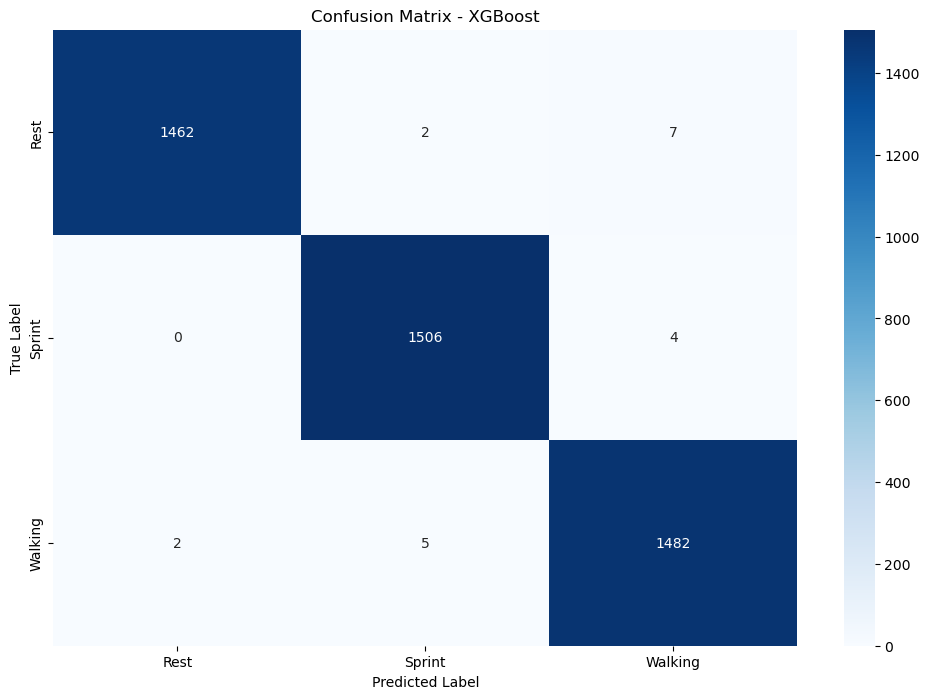

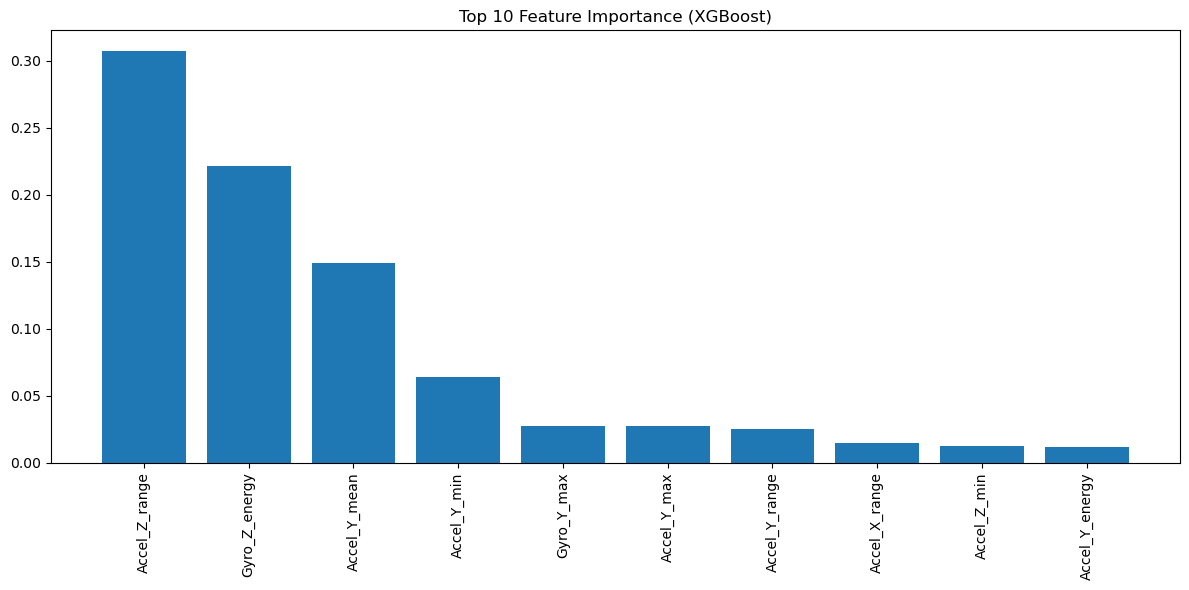


🔥 Model XGBoost siap dipakai!


In [27]:
BASE_OUTPUT = r"C:\Users\Zain Iqbal Saputra\Model XGBoost\Output_Data"
FEATURES_CSV = "features_dataset.csv"

ACTIVITIES = ["Rest","Sprint","Walking"]

WINDOW_SIZE = 200
STEP_SIZE = 100

def extract_features_from_window(window_df):
    features = {}
    for col in ["Accel_X","Accel_Y","Accel_Z",
                "Gyro_X","Gyro_Y","Gyro_Z",
                "Mag_X","Mag_Y","Mag_Z"]:
        
        data = window_df[col].values
        features[f"{col}_mean"]   = np.mean(data)
        features[f"{col}_std"]    = np.std(data)
        features[f"{col}_max"]    = np.max(data)
        features[f"{col}_min"]    = np.min(data)
        features[f"{col}_range"]  = np.max(data) - np.min(data)
        features[f"{col}_energy"] = np.sum(data ** 2) / len(data)
    
    return features

# — Feature extraction
if not os.path.exists(FEATURES_CSV):
    all_features = []
    print("🚀 Ekstraksi fitur dimulai...")

    for act in ACTIVITIES:
        file = os.path.join(BASE_OUTPUT, f"{act}.csv")
        if os.path.exists(file):
            df = pd.read_csv(file)
            df["Activity"] = act
            
            from tqdm import tqdm
            for i in tqdm(range(0, len(df) - WINDOW_SIZE, STEP_SIZE), desc=f"Processing {act}"):
                window = df.iloc[i:i+WINDOW_SIZE]
                feat = extract_features_from_window(window)
                feat["Activity"] = act
                all_features.append(feat)

    features_df = pd.DataFrame(all_features)
    features_df.to_csv(FEATURES_CSV, index=False)
    print(f"✅ Ekstraksi fitur selesai → {FEATURES_CSV}")

else:
    print("📂 Fitur ditemukan, memuat CSV...")
    features_df = pd.read_csv(FEATURES_CSV)

print("Feature dataset shape:", features_df.shape)

# — Model prep
X = features_df.drop("Activity", axis=1)
y = features_df["Activity"]

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print(f"Train: {len(X_train)} | Test: {len(X_test)}")

# 🔥 XGBOOST MODEL
xgb_model = XGBClassifier(
    n_estimators=300,
    max_depth=12,
    learning_rate=0.1,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42,
    n_jobs=-1,
    eval_metric="mlogloss"
)

print("\n🚀 Training XGBoost...")
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

print("\n=== Classification Report (XGBoost) ===")
print(classification_report(y_test, y_pred, target_names=le.classes_))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - XGBoost")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

importances = xgb_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12,6))
plt.title("Top 10 Feature Importance (XGBoost)")
plt.bar(range(10), importances[indices[:10]])
plt.xticks(range(10), X.columns[indices[:10]], rotation=90)
plt.tight_layout()
plt.show()

print("\n🔥 Model XGBoost siap dipakai!")